# European Cities Analysis

## (1) Introduction:

In this project, I used a Jupyter notebook to outline data analysis from a 'csv' file. I implemented the *NumPy* and *pandas* Python libraries to clean and analyze the European cities data. Then, with the *Matplotlib* library, I created insightful and helpful visualizations of the data.

### The Goal:

Breakdown the process of analyzing data in an informative way that can be applied to any dataset and any situation.

### Steps:

1. Clean the dataset (missing values, rounding, etc.)
2. Analyze the dataset (subsetting, maximum values, etc.)
3. Visualize the dataset (bar charts, scatter plots, etc.)

### Import Statements

In [5]:
import numpy as np
import pandas as pd
from pandas import Series
from pandas import DataFrame
from matplotlib import pyplot as plt

### Reading The File

In [6]:
tempFile = open("EuCitiesData.csv")
temps = pd.read_csv(tempFile)
temps

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,NaN
2,Innsbruck,Austria,8.57,yes,no,NaN,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,NaN,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79
...,...,...,...,...,...,...,...,...
208,Edinburgh,United Kingdom,65.11,yes,yes,55.95,NaN,NaN
209,Exeter,United Kingdom,65.11,yes,yes,50.70,-3.53,10.14
210,Inverness,United Kingdom,65.11,yes,yes,NaN,-4.23,8.00
211,Glasgow,United Kingdom,65.11,yes,yes,55.87,-4.25,8.60


***

## (2) Data Cleaning:

Missing Coordinate Values:

- Filled in the missing latitude and longitude values by calculating the average for that country (rounded to 2 decimal places).

In [7]:
avg_lat = temps.groupby("country")["latitude"].mean().round(2)

In [8]:
avg_long = temps.groupby("country")["longitude"].mean().round(2)

In [9]:
temps["latitude"] = temps["latitude"].fillna(temps["country"].map(avg_lat))
temps["longitude"] = temps["longitude"].fillna(temps["country"].map(avg_long))
temps

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,NaN
2,Innsbruck,Austria,8.57,yes,no,47.85,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,14.02,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79
...,...,...,...,...,...,...,...,...
208,Edinburgh,United Kingdom,65.11,yes,yes,55.95,-2.94,NaN
209,Exeter,United Kingdom,65.11,yes,yes,50.70,-3.53,10.14
210,Inverness,United Kingdom,65.11,yes,yes,53.55,-4.23,8.00
211,Glasgow,United Kingdom,65.11,yes,yes,55.87,-4.25,8.60


Missing Temperature Values:

- Filled in the missing temperature values by the average temperature value of the similar region type.

<div class="alert alert-block alert-info">
<b>Clarify:</b> I considered a region type to be a combinaton of whether it is in EU (yes/no) and whether it has a coastline (yes/no)
</div>

In [10]:
avg_temp = temps.groupby(["EU", "coastline"])["temperature"].mean()
avg_temp

EU   coastline
no   no            7.481538
     yes           9.732000
yes  no            7.538333
     yes          10.314494
Name: temperature, dtype: float64

In [11]:
temps["temperature"] = temps["temperature"].fillna(temps[["EU", "coastline"]].apply(tuple, axis=1).map(avg_temp))
temps

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.180000
1,Andorra,Andorra,0.07,no,no,42.50,1.52,7.481538
2,Innsbruck,Austria,8.57,yes,no,47.85,11.41,4.540000
3,Graz,Austria,8.57,yes,no,47.08,14.02,6.910000
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.790000
...,...,...,...,...,...,...,...,...
208,Edinburgh,United Kingdom,65.11,yes,yes,55.95,-2.94,10.314494
209,Exeter,United Kingdom,65.11,yes,yes,50.70,-3.53,10.140000
210,Inverness,United Kingdom,65.11,yes,yes,53.55,-4.23,8.000000
211,Glasgow,United Kingdom,65.11,yes,yes,55.87,-4.25,8.600000


***

## (3) Analysis:

Subset of Cities:

- Found out the subset of cities that lied between latitudes 40 to 60 (both inclusive) and longitudes 15 to 30 (both inclusive).
- I then found out which countries had the maximum number of cities in this geographical band.

<div class="alert alert-block alert-info">
<b>Clarify:</b> More than one country could have the maximum number of values.
</div>

In [12]:
sub_temps = temps[(temps["latitude"] >= 40) & (temps["latitude"] <= 60) & (temps["longitude"] >= 15) & (temps["longitude"] <= 30)]
sub_temps

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.180
6,Vienna,Austria,8.57,yes,no,48.20,16.37,7.860
7,Minsk,Belarus,9.48,no,no,52.61,27.57,5.280
8,Orsha,Belarus,9.48,no,no,52.61,25.64,4.930
9,Pinsk,Belarus,9.48,no,no,52.61,25.64,6.420
...,...,...,...,...,...,...,...,...
165,Bursa,Turkey,79.62,no,yes,40.20,29.07,11.160
169,Edirne,Turkey,79.62,no,yes,41.67,26.57,9.732
183,Tekirdag,Turkey,79.62,no,yes,40.99,27.51,13.020
186,Chernivtsi,Ukraine,44.62,no,yes,48.71,25.92,7.060


In [13]:
city_counts = sub_temps["country"].value_counts()
max_countries = city_counts[city_counts == city_counts.max()].index.tolist()
max_countries

['Romania', 'Poland']

***

## (4) Visualization:

Bar Chart:

- Plotted a bar chart to count the number of cities that belong to each region.

In [14]:
region_counts = temps.groupby(["EU", "coastline"]).size()
region_counts.reset_index()

,EU,coastline,0
0,no,no,16
1,no,yes,47
2,yes,no,14
3,yes,yes,136


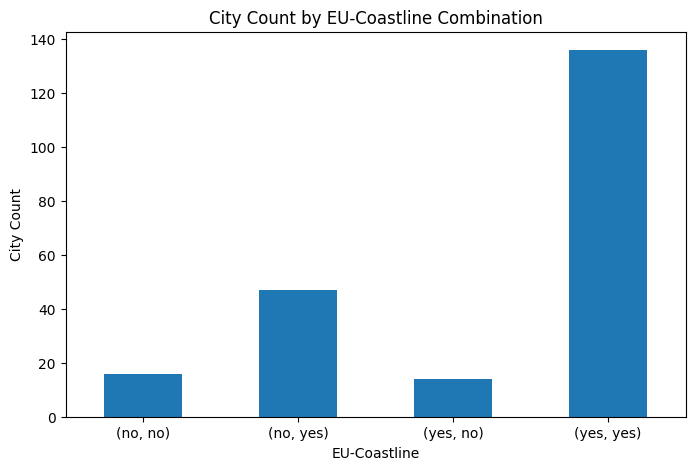

In [15]:
plt.figure(figsize=(8,5))
region_counts.plot(kind="bar")
plt.xticks(rotation=0)
plt.xlabel("EU-Coastline")
plt.ylabel("City Count")
plt.title("City Count by EU-Coastline Combination")
plt.show()

Scatter Plot:

- Plotted a scatter plot of latitude (y-axis) v/s longitude (x-axis) values to get a map-like visual of the cities under consideration.
- I also color-coordinated the cities based on their associated countries.

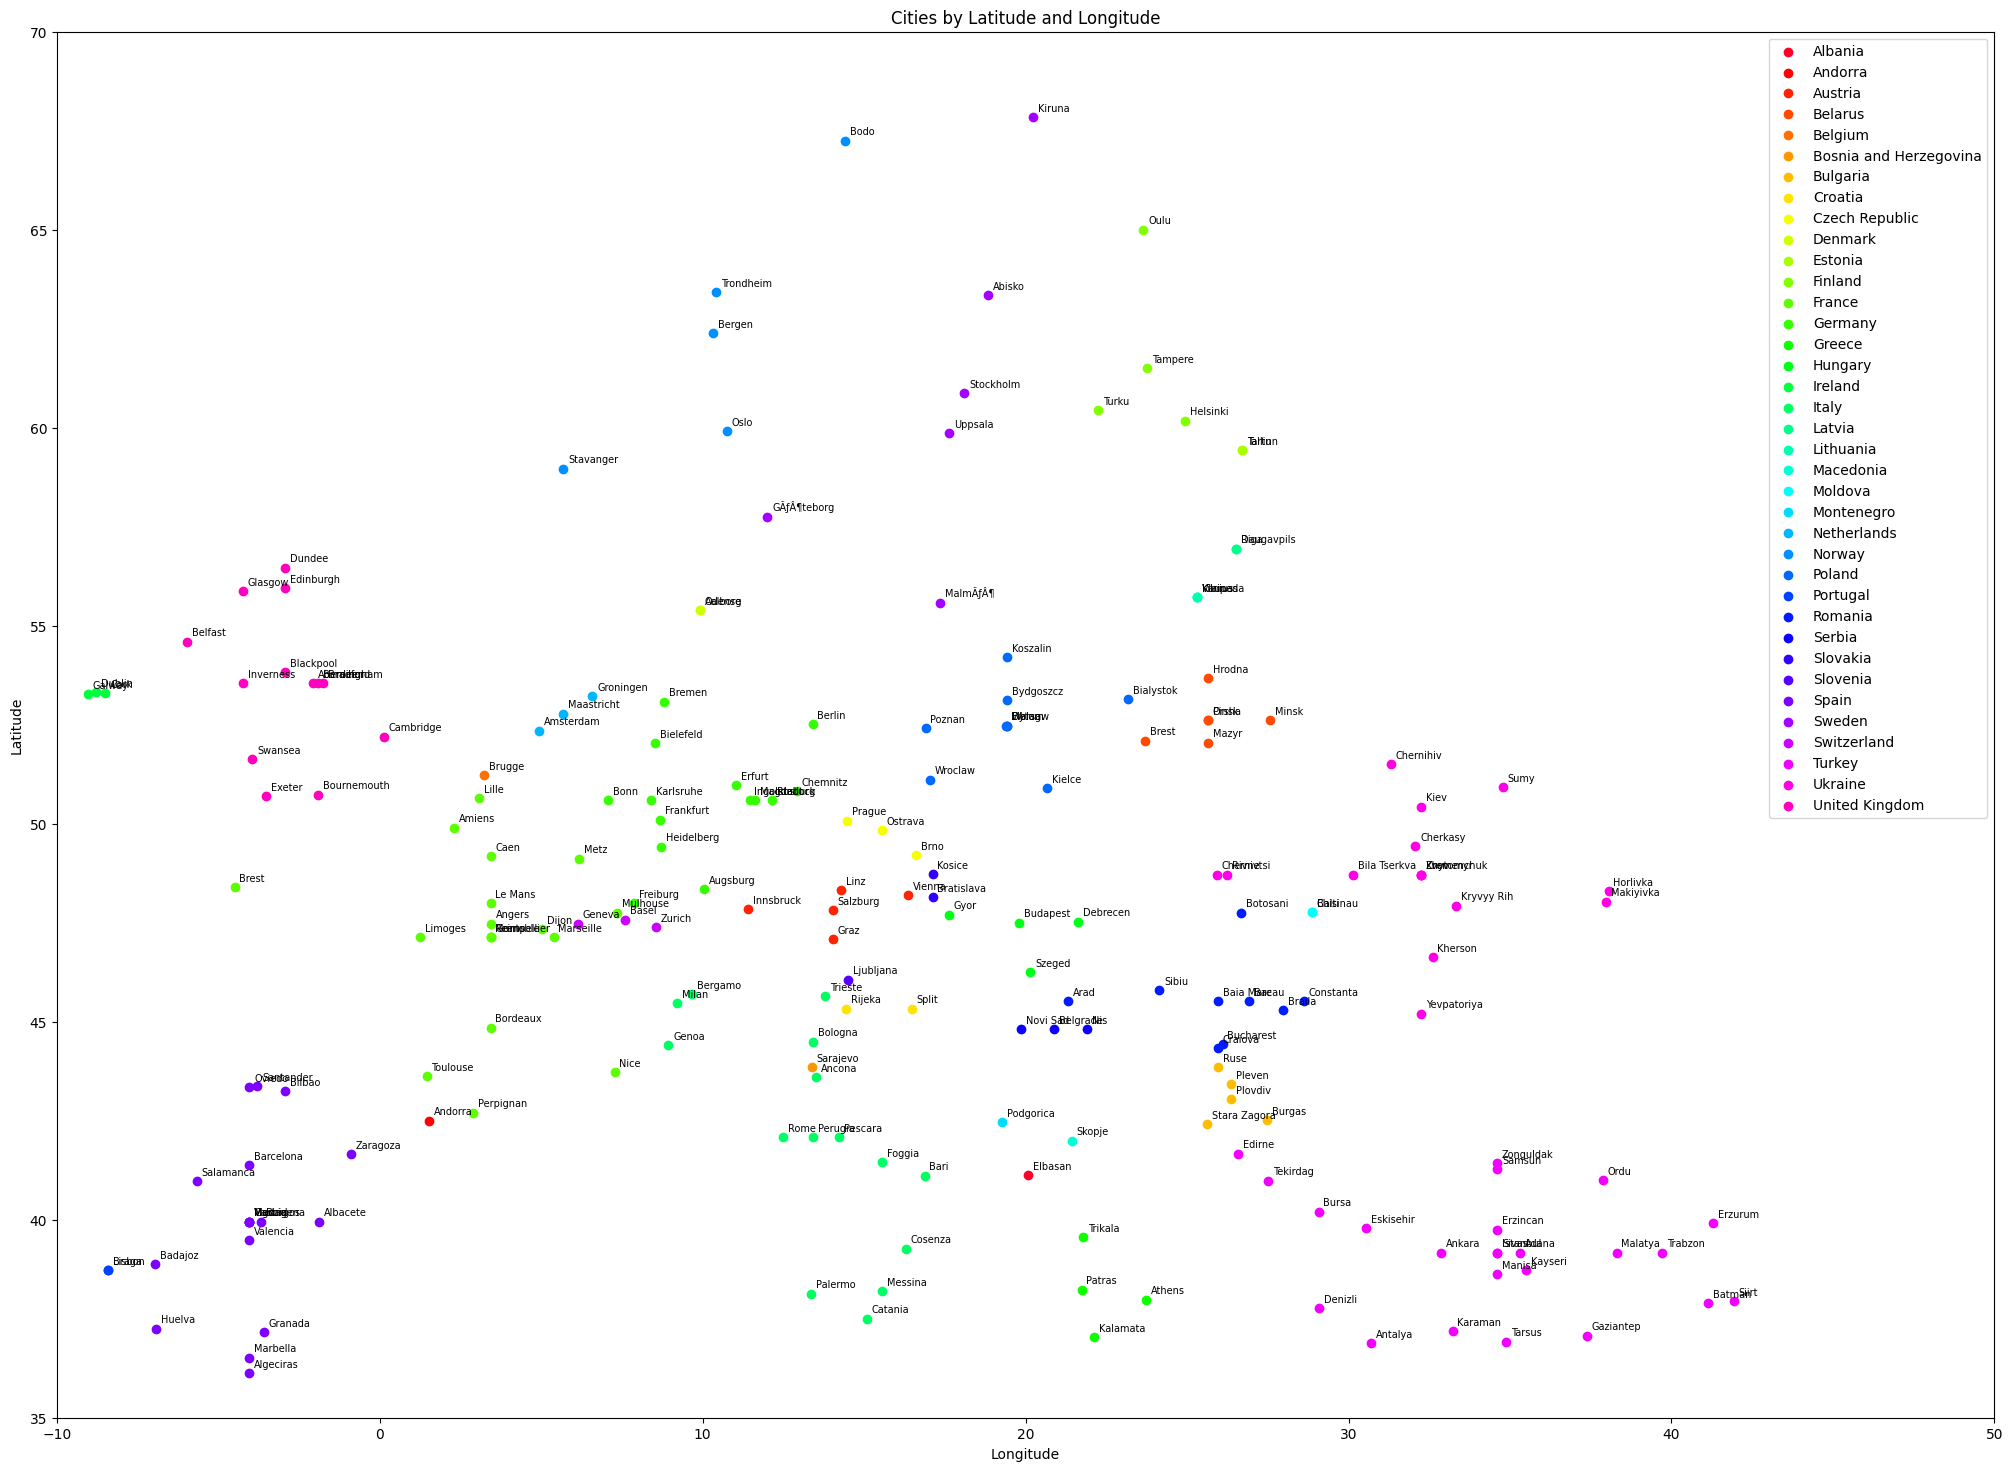

In [16]:
# there are 37 unique countries
# Get unique countries
countries = temps["country"].unique()
# Get a colormap with a color for each country
cmap = plt.get_cmap('gist_rainbow', len(countries))

# Create a dictionary mapping each country to a color
country_to_color = {country: cmap(i) for i, country in enumerate(countries)}

# Map each country in the dataframe to a color
color_list = [country_to_color[country] for country in temps["country"]]

# Plot the scatter plot with colors
plt.figure(figsize=(25, 18))
for country, color in country_to_color.items():
    plt.scatter(temps[temps["country"] == country]["longitude"], temps[temps["country"] == country]["latitude"], label=country, color=color)
plt.xlabel("Longitude")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Cities by Latitude and Longitude")
plt.legend()
plt.xlim(-10, 50)
plt.ylim(35, 70)
for i, row in temps.iterrows():
    x_offset = 0.15
    y_offset = 0.15
    plt.text(row["longitude"] + x_offset, row["latitude"] + y_offset, row["city"], fontsize=7, ha='left')
plt.show()

Histogram:

- Plotted a histogram of the number of countries belonging to each population group and split the population values into 5 bins (groups).

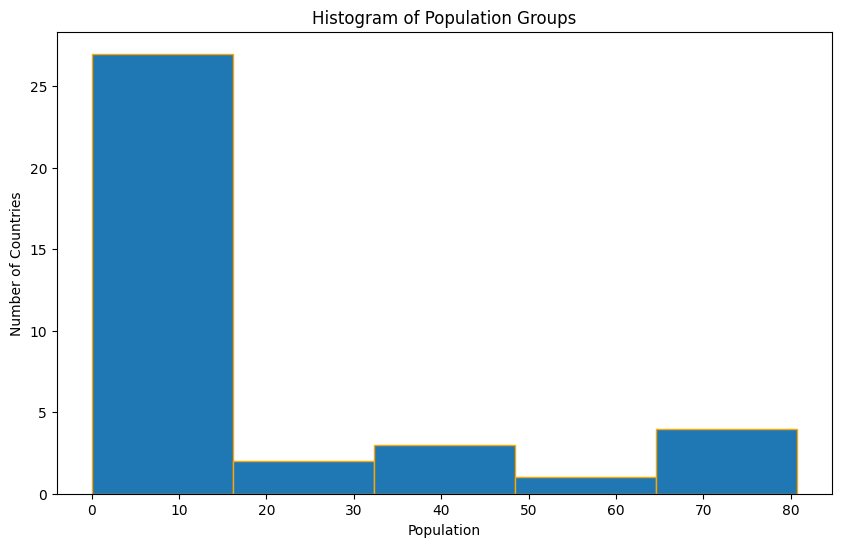

In [17]:
unique_countries = temps.groupby("country")['population'].first()
plt.figure(figsize=(10, 6))
plt.hist(unique_countries, bins=5, edgecolor='orange')
plt.xlabel("Population")
plt.ylabel("Number of Countries")
plt.title("Histogram of Population Groups")
plt.show()

Subplots:

- Plotted subplots (2, 2), with proper titles, one each for the differet region types.

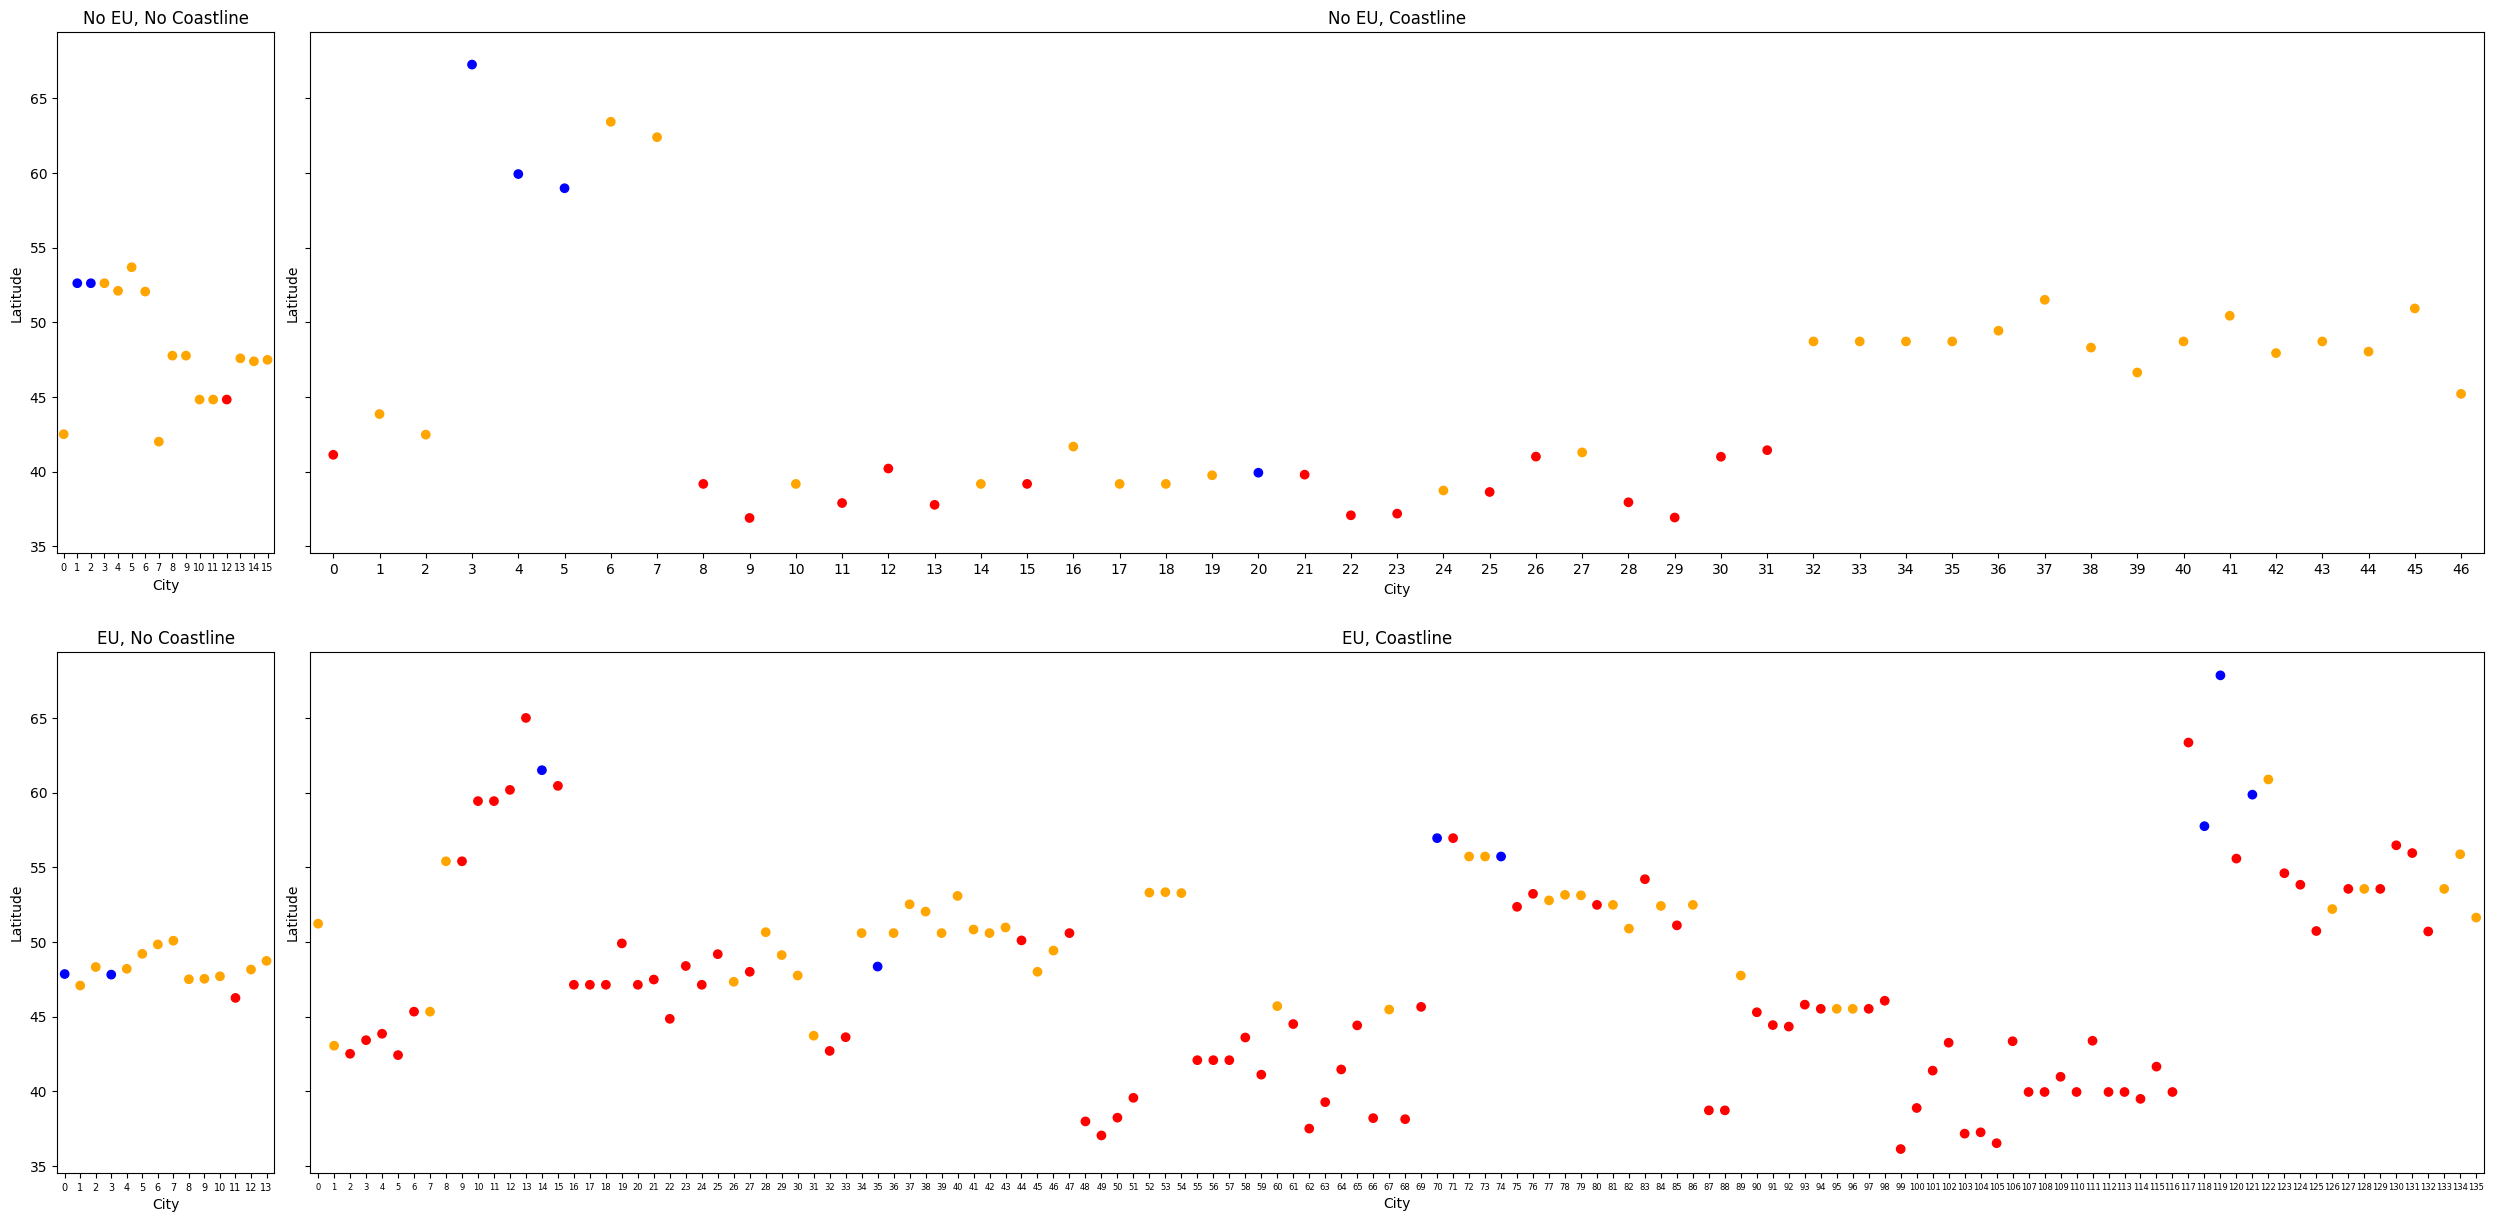

In [18]:
nn = temps[(temps["EU"] == "no") & (temps["coastline"] == "no")]
ny = temps[(temps["EU"] == "no") & (temps["coastline"] == "yes")]
yn = temps[(temps["EU"] == "yes") & (temps["coastline"] == "no")]
yy = temps[(temps["EU"] == "yes") & (temps["coastline"] == "yes")]

low_temp = 6
high_temp = 10

fig, axes = plt.subplots(2,2,figsize=(25,12),sharey=True,sharex=False, gridspec_kw={'width_ratios': [1, 10,]})
fig.tight_layout(h_pad=5.0,w_pad=1.0)

axes[0][0].scatter(nn["city"], nn["latitude"], c=np.where(nn["temperature"] > high_temp, 'red', np.where(nn["temperature"] < low_temp, 'blue', 'orange')))
axes[0][0].set_xlabel("City")
axes[0][0].set_ylabel("Latitude")
axes[0][0].set_title("No EU, No Coastline")
axes[0][0].set_xticks(np.arange(len(nn)))
axes[0][0].set_xticklabels(np.arange(len(nn)), fontsize=7)
axes[0][0].set_xlim(-0.5, len(nn) - 0.5)

axes[0][1].scatter(ny["city"], ny["latitude"], c=np.where(ny["temperature"] > high_temp, 'red', np.where(ny["temperature"] < low_temp, 'blue', 'orange')))
axes[0][1].set_xlabel("City")
axes[0][1].set_ylabel("Latitude")
axes[0][1].set_title("No EU, Coastline")
axes[0][1].set_xticks(np.arange(len(ny)))
axes[0][1].set_xticklabels(np.arange(len(ny)))
axes[0][1].set_xlim(-0.5, len(ny) - 0.5)

axes[1][0].scatter(yn["city"], yn["latitude"], c=np.where(yn["temperature"] > high_temp, 'red', np.where(yn["temperature"] < low_temp, 'blue', 'orange')))
axes[1][0].set_xlabel("City")
axes[1][0].set_ylabel("Latitude")
axes[1][0].set_title("EU, No Coastline")
axes[1][0].set_xticks(np.arange(len(yn)))
axes[1][0].set_xticklabels(np.arange(len(yn)), fontsize=7)
axes[1][0].set_xlim(-0.5, len(yn) - 0.5)

axes[1][1].scatter(yy["city"], yy["latitude"], c=np.where(yy["temperature"] > high_temp, 'red', np.where(yy["temperature"] < low_temp, 'blue', 'orange')))
axes[1][1].set_xlabel("City")
axes[1][1].set_ylabel("Latitude")
axes[1][1].set_title("EU, Coastline")
axes[1][1].set_xticks(np.arange(len(yy)))
axes[1][1].set_xticklabels(np.arange(len(yy)), fontsize=6)
axes[1][1].set_xlim(-0.5, len(yy) - 0.5)

plt.show()